# Background :

<b>What is BoomBikes ?</b>
A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system

<b>Business objective: </b>
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

<b>Given : </b></b>
Bike Sharing Dataset as day.csv 
Data Dictionary as Readme.txt

<b>Requirement: </b> 
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands.


<b>Need to :</b>
Create a linear model that describe the effect of various features on demand.
The model should be interpretable so that the management can understand it.




# Approach 

1. Understand the dataset
2. Identify Variable Types 
3. Drop unnecessary variables 
4. Data Visualization
    4.1 Perform EDA to understand various variables.
    4.2 Check the correlation between the variables.
5. Data Preparation
    5.1 Create dummy variables for all the categorical features.
    5.2 Divide the data to train & Test.
    5.3 Perform Scaling.
    5.4 Divide data into dependent & Independent variables.
6. Data Modelling & Evaluation
    6.1 Create Linear Regression model using mixed approach (RFE & VIF/p-value).
    6.2 Check the various assumptions.
    6.3 Check the Adjusted R-Square for both train & Test data.
    6.4 Report the final model.



## 1. Understand the dataset

In [1]:
#Import the basic libraries, will incluude the libraries on run time and on need basis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset 
bike_sharing_data = pd.read_csv('day.csv',index_col='instant')

In [4]:
# Understand the dataset 
bike_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the shape of dataset
bike_sharing_data.shape

(730, 15)

In [6]:
bike_sharing_data_dup = bike_sharing_data.copy()
bike_sharing_data_dup.drop_duplicates(subset=None, inplace=True)
bike_sharing_data_dup.shape

(730, 15)

No duplicates in the dataset 

In [7]:
# Use Describe to see the general trend of the variables 
bike_sharing_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Above data shows significant outliers at follwowing fields :
1. instant 
2. casual 
3. registered 
4. cnt 

In [8]:
# Check for missing values 
round(100*(bike_sharing_data.isnull().sum()/len(bike_sharing_data.index)), 2)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Data does not have any missing values. 

## 2. Identify Variable Types

In [9]:
# Check the attributes and ite types 
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


Apart from dteday for date, all others are int or float variable types .
Though the values are in integer many seems to be categorical variables. 
Numerical variables are - temp, atemp, hum,windspeed and cnt(this is target variable )

In [10]:
# Check the value counts for all variables ans see any opportunity to see data gaps
bike_sharing_data_dummy=bike_sharing_data.iloc[:,1:15]
for col in bike_sharing_data_dummy:
    print(bike_sharing_data_dummy[col].value_counts(ascending=False), '\n\n\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64 



1    365
0    365
Name: yr, dtype: int64 



12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
19.850847    4
26.615847    4
29.144153    4
17.937500    4
21.832500    3
29.861653    3
16.126653    3
14.486653    3
19.372500    3
22.550000    3
21.730000    3
14.042500    3
28.392500    3
14.076653    3
11.240847    3
13.085847    3
16.810000    3
18.825847    3
30.066653    3
27.367500    3
13.325000    3
15.750847    3
26.650000    3
31.775000    3
29.793347    3
            ..
15.716653    1
21.935000  

## 4. Data Visualization

We will drop the variables only when we have done EDA and have high understanding of the trend. Moving to next step


### 4.1 Perform EDA to understand various variables

Check the variables one by one

In [11]:
bike_sharing_data.dteday.describe()

count            730
unique           730
top       29-08-2019
freq               1
Name: dteday, dtype: object

In [12]:
bike_sharing_data['issue_d_day'],bike_sharing_data['issue_d_month'],bike_sharing_data['issue_d_year']= bike_sharing_data['dteday'].str.split('-').str

In [13]:
bike_sharing_data['issue_d_day'].describe()

count     730
unique     31
top        09
freq       24
Name: issue_d_day, dtype: object

In [14]:
bike_sharing_data['issue_d_month'].describe()

count     730
unique     12
top        05
freq       62
Name: issue_d_month, dtype: object

In [15]:
bike_sharing_data['issue_d_year'].describe()

count      730
unique       2
top       2019
freq       365
Name: issue_d_year, dtype: object

No Quality issue found in date field

In [16]:
#droping the added variables as we already have the respective columns 
bike_sharing_data = bike_sharing_data.drop(columns=['issue_d_year', 'issue_d_month'])

In [17]:
# Defining darplot function which we will use in next steps
def display_barplot(variable,title,x_label,y_label,fig_x,fig_y):
    temp_data=bike_sharing_data.groupby(by=variable).cnt.mean()
    fig_dims = (fig_x,fig_y)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.barplot(x =temp_data.index,y=temp_data.values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

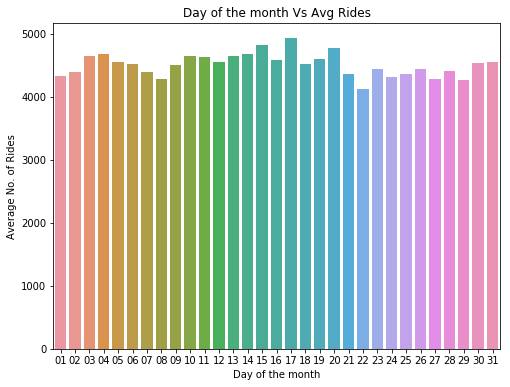

In [18]:
display_barplot('issue_d_day','Day of the month Vs Avg Rides','Day of the month','Average No. of Rides',8,6)

In [19]:
bike_sharing_data['season'].describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

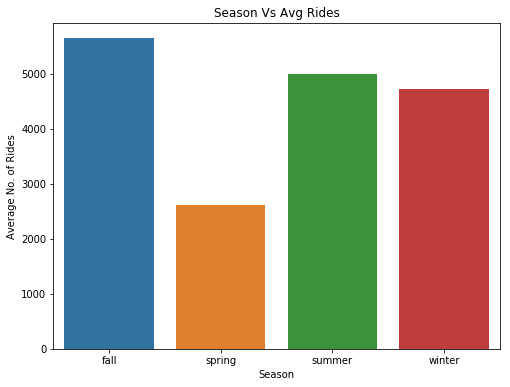

In [20]:
bike_sharing_data['season'] = bike_sharing_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
display_barplot('season','Season Vs Avg Rides','Season','Average No. of Rides',8,6)

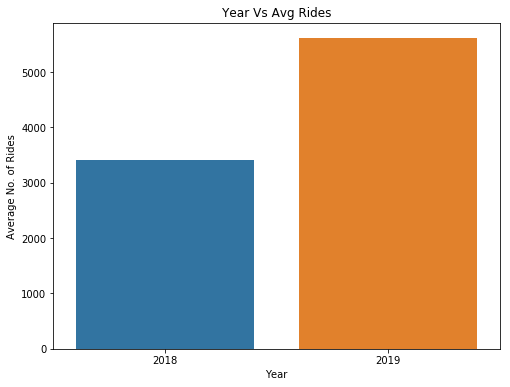

In [21]:
bike_sharing_data['yr'] = bike_sharing_data['yr'].map({0: '2018', 1: '2019'})
display_barplot('yr','Year Vs Avg Rides','Year','Average No. of Rides',8,6)

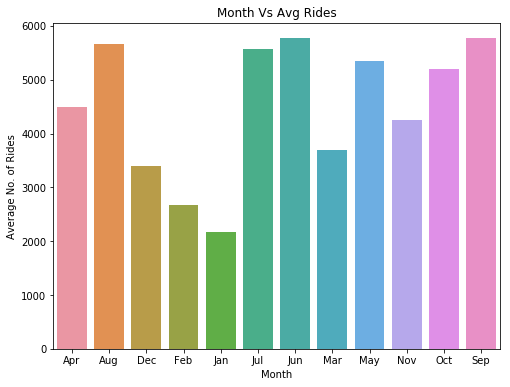

In [22]:
bike_sharing_data['mnth'] = bike_sharing_data['mnth'].map({1: 'Jan', 2: 'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
display_barplot('mnth','Month Vs Avg Rides','Month','Average No. of Rides',8,6)

https://www.timeanddate.com/calendar/aboutseasons.html

According to the meteorological definition, the seasons begin on the first day of the months that include the equinoxes and solstices. In the Northern Hemisphere, for example,

spring runs from March 1 to May 31;
summer runs from June 1 to August 31;
fall (autumn) runs from September 1 to November 30; and
winter runs from December 1 to February 28 (February 29 in a leap year).


We need to see the mapping of our dataset 

In [23]:
#Read the dataset 
bike_sharing_data_dup = pd.read_csv('day.csv',index_col='instant')
mnth_season_map=bike_sharing_data_dup[["mnth","season"]]
mnth_season_map['season']= mnth_season_map['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
mnth_season_map['mnth'] = mnth_season_map['mnth'].map({1: 'Jan', 2: 'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
mnth_season_map.set_index("mnth",inplace=True)
mnth_season_map.head()

,season
mnth,
Jan,spring
Jan,spring
Jan,spring
Jan,spring
Jan,spring


In [24]:
month_season_dict={}
for month,col in mnth_season_map.iterrows():
    month_season_dict.update({month:col["season"]})
    
month_season_dict   

{'Jan': 'spring',
 'Feb': 'spring',
 'Mar': 'summer',
 'Apr': 'summer',
 'May': 'summer',
 'Jun': 'fall',
 'Jul': 'fall',
 'Aug': 'fall',
 'Sep': 'winter',
 'Oct': 'winter',
 'Nov': 'winter',
 'Dec': 'spring'}

As per this data, season data is not appropriately captured and gives opportunity to revisit our interpretation on season 

We can go on with the analysis without updating our dataset and include the finding in the conclusion

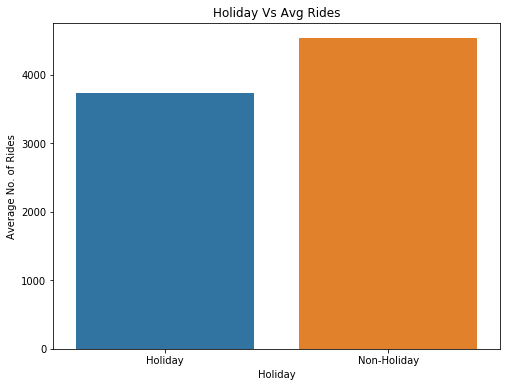

In [25]:
bike_sharing_data['holiday'] = bike_sharing_data['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
display_barplot('holiday','Holiday Vs Avg Rides','Holiday','Average No. of Rides',8,6)

In [26]:
# Check the data again to see what number corresponds to which day in the week 
bike_sharing_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,issue_d_day
instant,,,,,,,,,,,,,,,,
1,01-01-2018,spring,2018,Jan,Non-Holiday,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
2,02-01-2018,spring,2018,Jan,Non-Holiday,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
3,03-01-2018,spring,2018,Jan,Non-Holiday,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
4,04-01-2018,spring,2018,Jan,Non-Holiday,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
5,05-01-2018,spring,2018,Jan,Non-Holiday,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


01-01-2018 is a Monday as per calender and is with weekday 6 . So, 0 will correspond to Tuesday, 1 to Wednesday and so on

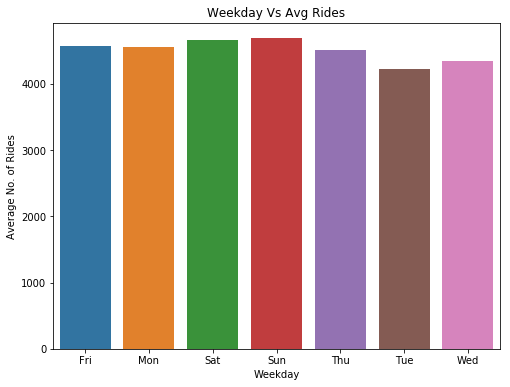

In [27]:
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map({0:'Tue', 1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})
display_barplot('weekday','Weekday Vs Avg Rides','Weekday','Average No. of Rides',8,6)

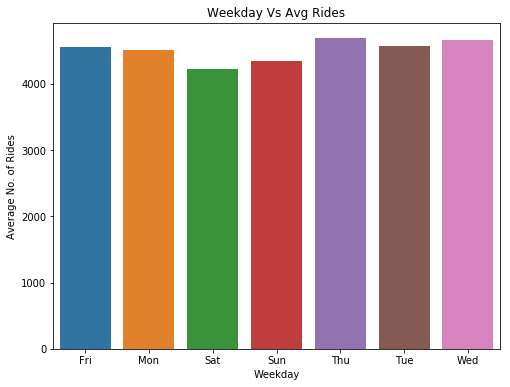

In [28]:
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map({'Tue':'Sat','Wed':'Sun','Thu':'Mon','Fri':'Tue','Sat':'Wed','Sun':'Thu','Mon':'Fri'})
display_barplot('weekday','Weekday Vs Avg Rides','Weekday','Average No. of Rides',8,6)

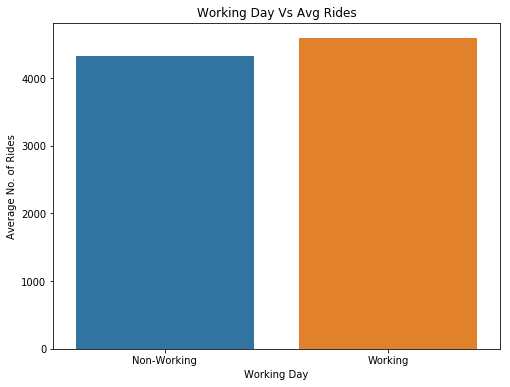

In [29]:
bike_sharing_data['workingday'] = bike_sharing_data['workingday'].map({1:'Working', 0:'Non-Working'})
display_barplot('workingday','Working Day Vs Avg Rides','Working Day','Average No. of Rides',8,6)

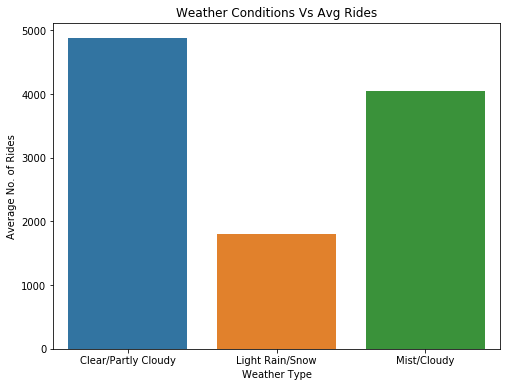

In [30]:
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map({1:'Clear/Partly Cloudy', 2:'Mist/Cloudy',3:'Light Rain/Snow'})
display_barplot('weathersit','Weather Conditions Vs Avg Rides','Weather Type','Average No. of Rides',8,6)

In [31]:
bike_sharing_data['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

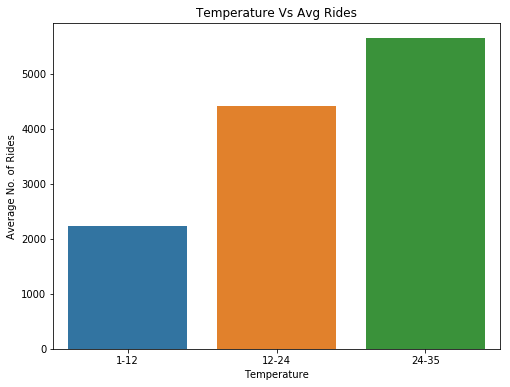

In [32]:
#Let's create derived variable using the temperature 
def categorige_temp(temp):
    if(temp <=12): #10
        return "1-12"
    elif(12<temp<=24): # 12 to 24
        return "12-24"
    else:#24 and above
        return "24-35"

bike_sharing_data['cat_temp']=bike_sharing_data.apply(lambda x: categorige_temp(x.temp),axis=1)
display_barplot('cat_temp','Temperature Vs Avg Rides','Temperature','Average No. of Rides',8,6)

In [33]:
bike_sharing_data['atemp'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

a_Temp looks similar to temp, we can ignore it for anlaysis 

In [34]:
bike_sharing_data['hum'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

humidity min value is 0. Lets see the rows with humidity 0

In [35]:
bike_sharing_data[bike_sharing_data['hum']==0]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,issue_d_day,cat_temp
instant,,,,,,,,,,,,,,,,,
69,10-03-2018,spring,2018,Mar,Non-Holiday,Wed,Working,Light Rain/Snow,15.952731,19.2834,0.0,17.545759,46,577,623,10,12-24


We have only one row with hum 0 where we have temp 15.952. We can impute is with the average 

Lets see the other data set with similar temperature range 15 -16

In [36]:
bike_sharing_data[ (bike_sharing_data['temp']>15 )& (bike_sharing_data['temp']<16)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,issue_d_day,cat_temp
instant,,,,,,,,,,,,,,,,,
64,05-03-2018,spring,2018,Mar,Non-Holiday,Fri,Non-Working,Mist/Cloudy,15.750847,18.93895,78.9167,16.875357,640,1437,2077,05,12-24
65,06-03-2018,spring,2018,Mar,Non-Holiday,Sat,Non-Working,Mist/Cloudy,15.437402,18.31260,94.8261,23.000229,114,491,605,06,12-24
69,10-03-2018,spring,2018,Mar,Non-Holiday,Wed,Working,Light Rain/Snow,15.952731,19.28340,0.0000,17.545759,46,577,623,10,12-24
72,13-03-2018,spring,2018,Mar,Non-Holiday,Sat,Non-Working,Clear/Partly Cloudy,15.758268,19.00455,52.7391,18.130468,982,1435,2417,13,12-24
93,03-04-2018,summer,2018,Apr,Non-Holiday,Sat,Non-Working,Clear/Partly Cloudy,15.511653,18.93835,48.0000,12.208271,1651,1598,3249,03,12-24
276,03-10-2018,winter,2018,Oct,Non-Holiday,Sun,Working,Mist/Cloudy,15.750847,19.60230,76.0833,5.584169,330,3240,3570,03,12-24
306,02-11-2018,winter,2018,Nov,Non-Holiday,Tue,Working,Clear/Partly Cloudy,15.477500,19.50665,71.8750,5.500144,370,3816,4186,02,12-24
314,10-11-2018,winter,2018,Nov,Non-Holiday,Wed,Working,Mist/Cloudy,15.580000,18.68605,81.3333,12.667489,190,2743,2933,10,12-24
328,24-11-2018,winter,2018,Nov,Holiday,Wed,Non-Working,Clear/Partly Cloudy,15.306653,18.62355,54.9167,11.209368,560,935,1495,24,12-24


There is lot of deviation within same temperature range . its safe to replce hum 0 value with mean 

In [37]:
# Use set_value to update hum with 0 value with mean. Above we sawy its only at 68 index
bike_sharing_data=bike_sharing_data.set_value(68,'hum',bike_sharing_data['hum'].mean())

In [38]:
#Validate if the hum 0 is replaced with its mean value 
bike_sharing_data.loc[68]

dteday          09-03-2018
season              spring
yr                    2018
mnth                   Mar
holiday        Non-Holiday
weekday                Tue
workingday         Working
weathersit     Mist/Cloudy
temp               12.1292
atemp              14.3304
hum                62.7652
windspeed            14.75
casual                 191
registered            1700
cnt                   1891
issue_d_day             09
cat_temp             12-24
Name: 68, dtype: object

Value updated as expected 

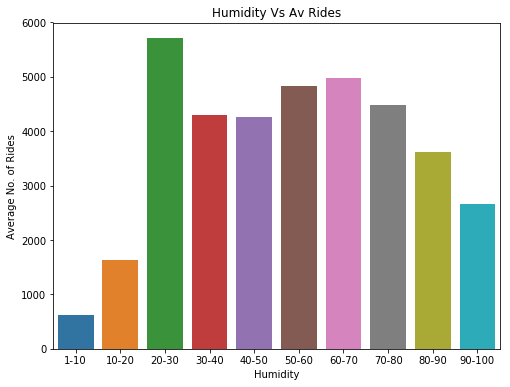

In [39]:
def categorige_hum(temp):
    if(temp <=10): #10
        return "1-10"
    elif(10<temp<=20): # 12 to 24
        return "10-20"
    elif(20<temp<=30): # 12 to 24
        return "20-30"
    elif(30<temp<=40): # 12 to 24
        return "30-40"
    elif(40<temp<=50): # 12 to 24
        return "40-50"
    elif(50<temp<=60): # 12 to 24
        return "50-60"
    elif(60<temp<=70): # 12 to 24
        return "60-70"
    elif(70<temp<=80): # 12 to 24
        return "70-80"
    elif(80<temp<=90): # 12 to 24
        return "80-90"
    else:#24 and above
        return "90-100"
    
bike_sharing_data['cat_hum']=bike_sharing_data.apply(lambda x: categorige_hum(x.hum),axis=1)    
display_barplot('cat_hum','Humidity Vs Av Rides','Humidity','Average No. of Rides',8,6)

In [40]:
bike_sharing_data['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

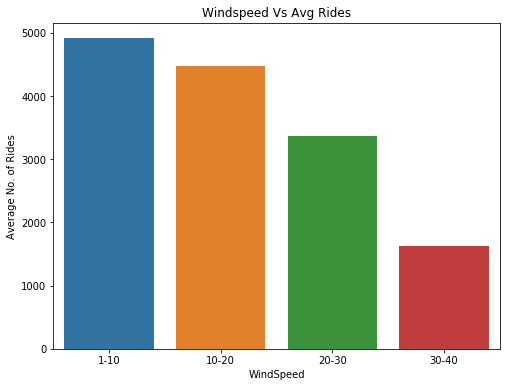

In [41]:
def categorige_windspeed(temp):
    if(temp <=10): #10
        return "1-10"
    elif(10<temp<=20): # 12 to 24
        return "10-20"
    elif(20<temp<=30): # 12 to 24
        return "20-30"
    else:#24 and above
        return "30-40"
    
    
bike_sharing_data['cat_windspeed']=bike_sharing_data.apply(lambda x: categorige_windspeed(x.windspeed),axis=1)    
display_barplot('cat_windspeed','Windspeed Vs Avg Rides','WindSpeed','Average No. of Rides',8,6) 


cnt is the target/ dependent variable that we need to analyze 
    

In [42]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 19 columns):
dteday           730 non-null object
season           730 non-null object
yr               730 non-null object
mnth             730 non-null object
holiday          730 non-null object
weekday          730 non-null object
workingday       730 non-null object
weathersit       730 non-null object
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
casual           730 non-null int64
registered       730 non-null int64
cnt              730 non-null int64
issue_d_day      730 non-null object
cat_temp         730 non-null object
cat_hum          730 non-null object
cat_windspeed    730 non-null object
dtypes: float64(4), int64(3), object(12)
memory usage: 134.1+ KB


### 4.2 Check the correlation between the variables

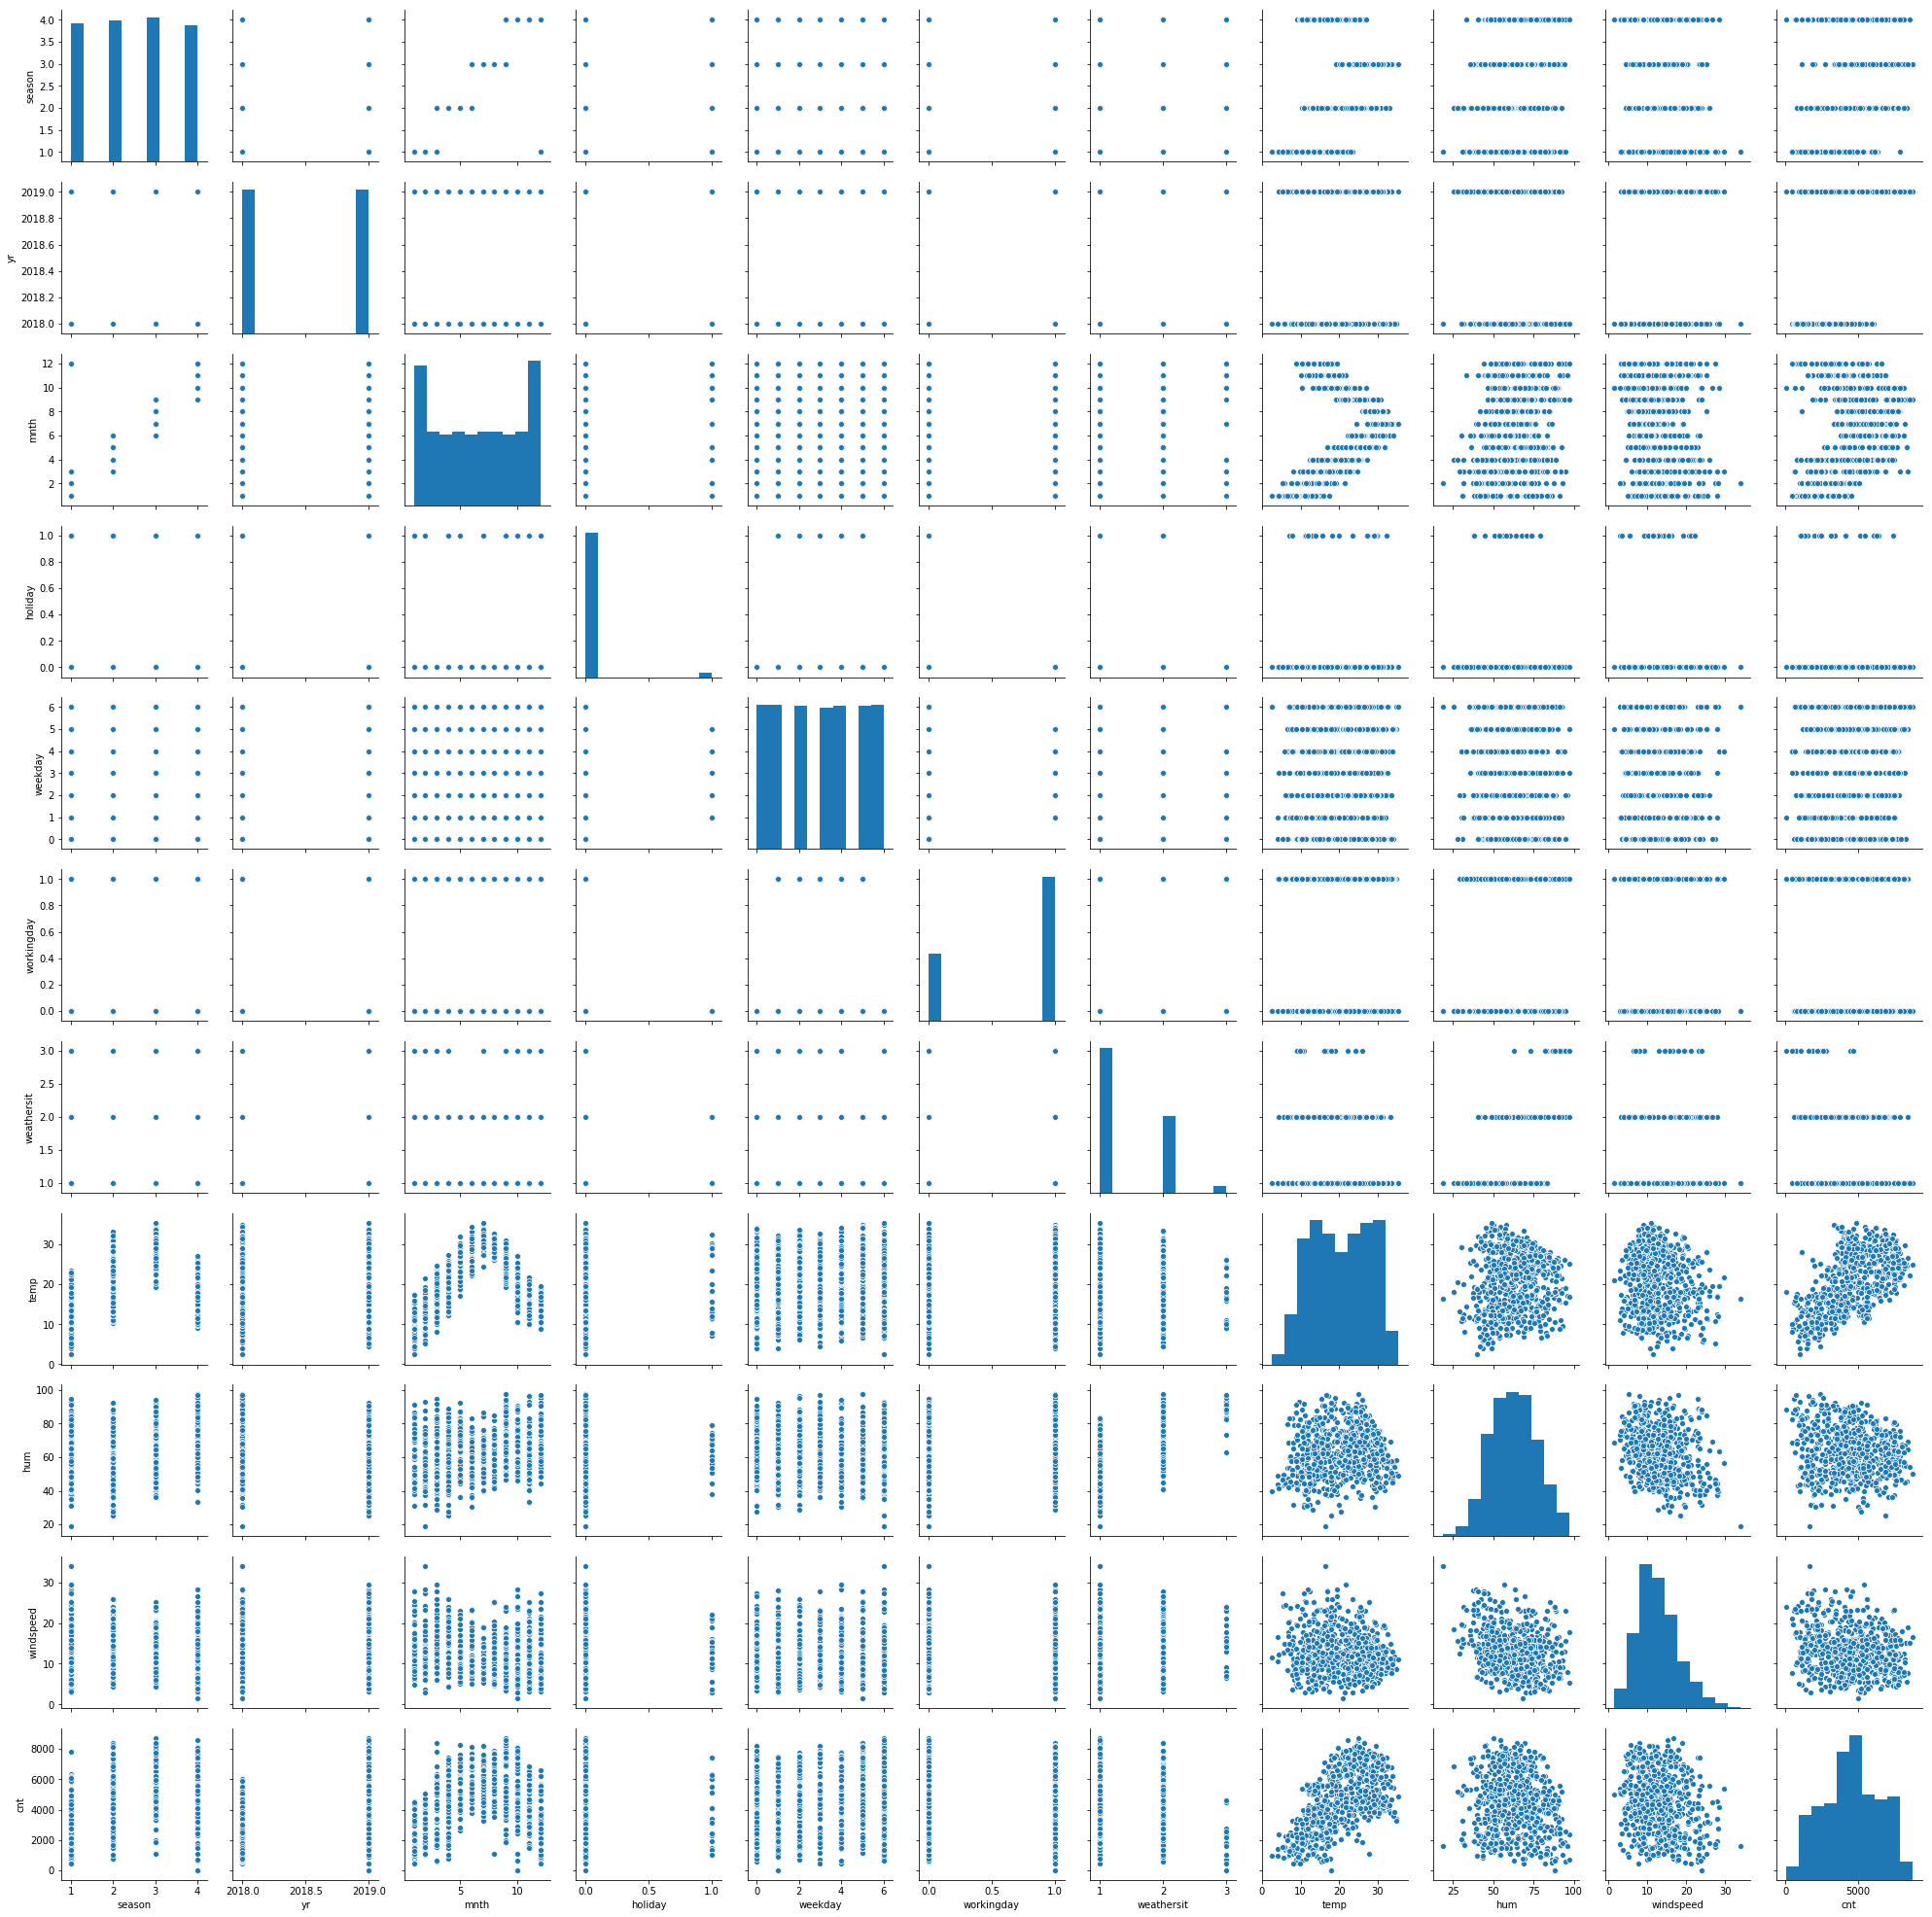

In [43]:
#Read the dataset for pair plot 
pair_plot_data = pd.read_csv('day.csv',index_col='instant')
pair_plot_data = pair_plot_data.drop(columns=['atemp', 'casual', 'registered'])
pair_plot_data['yr'] = pair_plot_data['yr'].map({0: 2018, 1:2019})
pair_plot_data.at[int(pair_plot_data[pair_plot_data['hum'] == 0.0].hum.index.values), "hum"] =  pair_plot_data.hum.mean()
sns.pairplot(pair_plot_data)

Strong trend 
- temp
- yr
- weather
Some trend 
- season
- month
- holiday
- humidity
- windspeed
- weekday
No impact


## 3. Drop unnecessary variables 

Dropfew columns which are not requires for analysis :
<li>dteday & issue_d_day as there is no significant tread as per above visualization </li>
<li>atemp as beaviour is similar to temp</li>
<li>casual and rgistered as we are intereted in total count </li>
<li>cat_temp,cat_hum,cat_windspeed as the are derived variables to see trend </li>
<li>holiday its very much related to workingday (it includes working and holiday) </li>

In [44]:
bike_sharing_data = bike_sharing_data.drop(columns=['dteday','issue_d_day','atemp', 'casual', 'registered','cat_temp','cat_hum','cat_windspeed','holiday'])

## 5. Data Preperartion 

In [45]:
#Covert the columns back to numeric values for further analysis as we will need numerical data.
bike_sharing_data['workingday'] = bike_sharing_data['workingday'].map({'Working':1, 'Non-Working':0})
bike_sharing_data['yr'] = bike_sharing_data['yr'].map({'2018':0, '2019':1})

### 5.1 Create dummy variables for all the categorical features.

In [46]:
dummy_variables_columns = ['mnth', 'season', 'weekday', 'weathersit','workingday']
status = pd.get_dummies(bike_sharing_data[dummy_variables_columns], drop_first=True)
status.head(10)

,workingday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
bike_sharing_data = pd.concat([bike_sharing_data, status], axis=1)
bike_sharing_data = bike_sharing_data.drop(columns=dummy_variables_columns)

### 5.2 Divide the data to train & Test

In [48]:
#import required sklearns libraies 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [49]:
#Split the data into Training and Test set with 70% Training and 30% Test dataset
X_train, X_test = train_test_split(bike_sharing_data, train_size=0.7, random_state=100)

In [50]:
#Validate the shape of the trianing and the test data set
print(X_train.shape)
print(X_test.shape)

(510, 27)
(220, 27)


### 5.3 Perform Scaling

In [51]:
#Identify the numerial variables 
numerical_variables = ['temp', 'hum', 'windspeed', 'cnt']

In [52]:
# Scale the date usin MinMax Scaler model
scaler = MinMaxScaler()

In [53]:
# Transform the dataset and check it 
X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])
X_train.head(10)

,yr,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
427,1,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
483,1,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
112,0,0.345824,0.751824,0.380981,0.191095,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
581,1,0.914852,0.632030,0.462538,0.782559,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,1,0.719639,0.719193,0.172431,0.851588,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
480,1,0.520271,0.440962,0.164434,0.710308,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
473,1,0.503656,0.586518,0.270032,0.499885,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


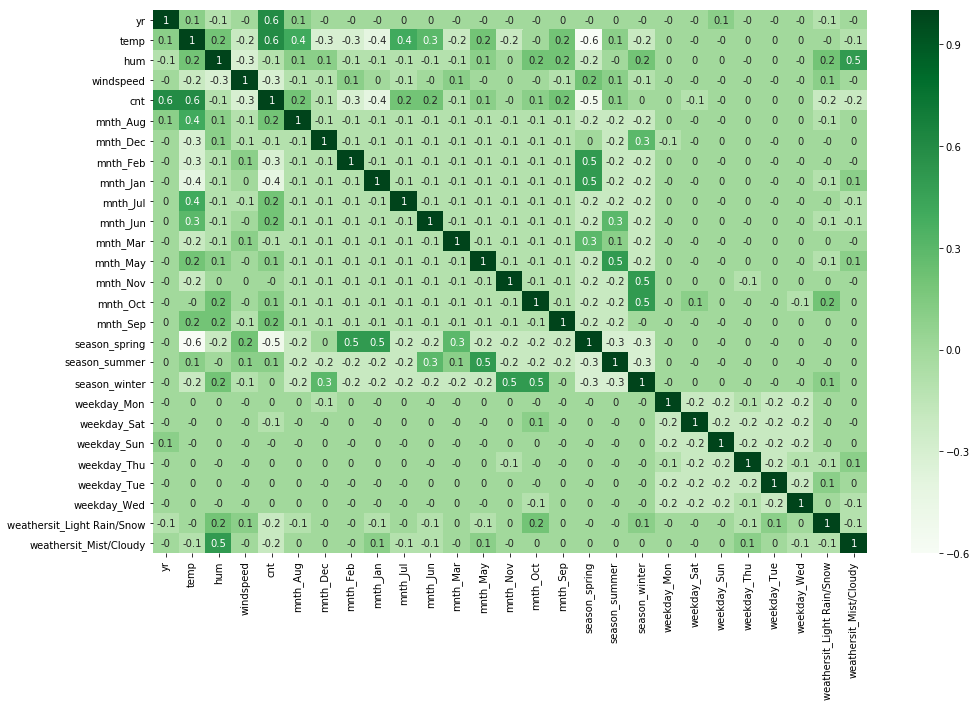

In [54]:
#Find corrletion of the variables using heat map
X_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(X_train.corr(), 1), annot=True, cmap='Greens')
plt.show()

### 5.4 Divide data into dependent & Independent variables.
cnt is our target(dependent) variable and other features are independent variables 

In [55]:
#Define X and y train
y_train = X_train.pop('cnt')
X_train = X_train

## 6. Data Modelling & Evaluation

### 6.1 Create Linear Regression model using mixed approach (RFE & VIF/p-value)

In [56]:
# Find RFE of the model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
#Check model intecept and coef from Linear Regression model
print(lm.intercept_)
print(lm.coef_)

0.3436632132552147
[ 0.23341687  0.43609224 -0.15070687 -0.1865305   0.02331798 -0.04955644
 -0.03630086 -0.06631325 -0.03020593  0.00875816  0.00276165  0.02755992
 -0.05276145  0.00147912  0.08275285 -0.04757076  0.04147971  0.11221929
 -0.01717357 -0.05388806 -0.03135726 -0.00078166 -0.00504683 -0.0105075
 -0.25271007 -0.05845623]


In [58]:
# Use RFE to identify the top features impacting the target variable
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
19,weekday_Sat,True,1
17,season_winter,True,1
16,season_summer,True,1
15,season_spring,True,1
14,mnth_Sep,True,1
24,weathersit_Light Rain/Snow,True,1
8,mnth_Jul,True,1
12,mnth_Nov,True,1
2,hum,True,1


In [59]:
# Import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#Get model Summary using OLS
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(endog=y_train, exog=X_train_sm.astype(float)) 
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          3.07e-189
Time:                        22:38:06   Log-Likelihood:                 515.20
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     494   BIC:                            -930.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3244      0.036      9.011      0.000       0.254       0.395
yr                             0.2310      0.008     28.632      0.000       0.215       0.247
temp                           0.4747      0.037     12.836      0.000       0.402       0.547
hum                           -0.1542      0.038     -4.071      0.000      -0.229      -0.080
windspeed                     -0.1888      0.026     -7.334      0.000      -0.239      -0.138
mnth_Dec                      -0.0391      0.017     -2.234      0.026      -0.073      -0.005
mnth_Jan                      -0.0461      0.018     -2.544      0.011      -0.082      -0.010
mnth_Jul                      -0.0514      0.018     -2.821      0.005      -0.087      -0.016
mnth_Nov                      -0.0486      0.019     -2.604      0.009      -0.085      -0.012
mnth_Sep                       0.0696      0.017      4.135      0.000       0.037       0.103
season_spring                 -0.0647      0.021     -3.052      0.002      -0.106      -0.023
season_summer                  0.0419      0.015      2.736      0.006       0.012       0.072
season_winter                  0.1035      0.018      5.752      0.000       0.068       0.139
weekday_Sat                   -0.0431      0.011     -3.780      0.000      -0.066      -0.021
weathersit_Light Rain/Snow    -0.2503      0.026     -9.470      0.000      -0.302      -0.198
weathersit_Mist/Cloudy        -0.0560      0.010     -5.362      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       85.557   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.215
Skew:                          -0.798   Prob(JB):                     4.64e-55
Kurtosis:                       6.038   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.841 is explained by the linear model we developed 

In [61]:
# Writing function to calculate VIF for the variables to check multicolinearity 
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [62]:
#X_train_rfe.info
fetch_vif_df(X_train_rfe)

,Features,VIF
0,hum,31.23
1,temp,17.85
2,windspeed,4.73
3,season_spring,4.34
4,season_winter,4.07
5,season_summer,2.82
6,weathersit_Mist/Cloudy,2.33
7,yr,2.09
8,mnth_Nov,1.82
9,mnth_Jan,1.75


Though p value for hum and temp is lower than accepted value. The VIF is significantly large. We will drop hum and it seems to be related to tempearature, season variables 

In [63]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          7.37e-187
Time:                        22:38:06   Log-Likelihood:                 506.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     495   BIC:                            -920.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2543      0.032      7.919      0.000       0.191       0.317
yr                             0.2348      0.008     28.842      0.000       0.219       0.251
temp                           0.4337      0.036     12.000      0.000       0.363       0.505
windspeed                     -0.1602      0.025     -6.368      0.000      -0.210      -0.111
mnth_Dec                      -0.0464      0.018     -2.627      0.009      -0.081      -0.012
mnth_Jan                      -0.0529      0.018     -2.885      0.004      -0.089      -0.017
mnth_Jul                      -0.0462      0.018     -2.503      0.013      -0.082      -0.010
mnth_Nov                      -0.0496      0.019     -2.620      0.009      -0.087      -0.012
mnth_Sep                       0.0630      0.017      3.704      0.000       0.030       0.096
season_spring                 -0.0739      0.021     -3.453      0.001      -0.116      -0.032
season_summer                  0.0348      0.015      2.252      0.025       0.004       0.065
season_winter                  0.0894      0.018      4.986      0.000       0.054       0.125
weekday_Sat                   -0.0466      0.012     -4.032      0.000      -0.069      -0.024
weathersit_Light Rain/Snow    -0.2937      0.025    -11.957      0.000      -0.342      -0.245
weathersit_Mist/Cloudy        -0.0805      0.009     -9.278      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       87.659   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.786
Skew:                          -0.813   Prob(JB):                     3.87e-57
Kurtosis:                       6.096   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#X_train_rfe.info
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,5.21
1,windspeed,4.67
2,season_winter,2.98
3,season_spring,2.90
4,season_summer,2.25
5,yr,2.07
6,mnth_Nov,1.79
7,mnth_Jan,1.66
8,mnth_Jul,1.60
9,weathersit_Mist/Cloudy,1.56


Since p value of the all the variables is lower than 0.05, we can proceed with the next steps 

In [65]:
lr_model.params

const                         0.254282
yr                            0.234807
temp                          0.433670
windspeed                    -0.160187
mnth_Dec                     -0.046442
mnth_Jan                     -0.052854
mnth_Jul                     -0.046197
mnth_Nov                     -0.049629
mnth_Sep                      0.063019
season_spring                -0.073884
season_summer                 0.034770
season_winter                 0.089419
weekday_Sat                  -0.046609
weathersit_Light Rain/Snow   -0.293736
weathersit_Mist/Cloudy       -0.080492
dtype: float64

In [66]:
lr_model.params?

In [67]:
col = col.drop(['season_summer'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          6.31e-187
Time:                        22:38:06   Log-Likelihood:                 504.18
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     496   BIC:                            -921.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2989      0.025     11.783      0.000       0.249       0.349
yr                             0.2354      0.008     28.809      0.000       0.219       0.251
temp                           0.3970      0.032     12.257      0.000       0.333       0.461
windspeed                     -0.1554      0.025     -6.174      0.000      -0.205      -0.106
mnth_Dec                      -0.0532      0.017     -3.043      0.002      -0.088      -0.019
mnth_Jan                      -0.0585      0.018     -3.208      0.001      -0.094      -0.023
mnth_Jul                      -0.0608      0.017     -3.508      0.000      -0.095      -0.027
mnth_Nov                      -0.0569      0.019     -3.037      0.003      -0.094      -0.020
mnth_Sep                       0.0478      0.016      3.049      0.002       0.017       0.079
season_spring                 -0.1071      0.016     -6.879      0.000      -0.138      -0.077
season_winter                  0.0647      0.014      4.545      0.000       0.037       0.093
weekday_Sat                   -0.0464      0.012     -3.998      0.000      -0.069      -0.024
weathersit_Light Rain/Snow    -0.2958      0.025    -12.002      0.000      -0.344      -0.247
weathersit_Mist/Cloudy        -0.0802      0.009     -9.207      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       87.444   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.179
Skew:                          -0.797   Prob(JB):                     2.14e-59
Kurtosis:                       6.190   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#X_train_rfe.info
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.73
1,windspeed,4.05
2,season_winter,2.58
3,season_spring,2.36
4,yr,2.06
5,mnth_Nov,1.79
6,mnth_Jan,1.65
7,weathersit_Mist/Cloudy,1.53
8,mnth_Dec,1.46
9,mnth_Jul,1.36


Since p value of the variables is under 0.05 and VIF of the features are less than 5 . we can consider above final variables and use the model as final model 

In [69]:
lr_model.params.sort_values(ascending=False)

temp                          0.396968
const                         0.298910
yr                            0.235385
season_winter                 0.064666
mnth_Sep                      0.047803
weekday_Sat                  -0.046400
mnth_Dec                     -0.053221
mnth_Nov                     -0.056918
mnth_Jan                     -0.058460
mnth_Jul                     -0.060840
weathersit_Mist/Cloudy       -0.080187
season_spring                -0.107089
windspeed                    -0.155365
weathersit_Light Rain/Snow   -0.295830
dtype: float64

With above its intercept / const is 0.299 

Top 3 Features impacting the rides :
<li>Temperature (+ve correlation with 0.397 coeff)</li>
<li>Weathersit_Light Rain/Snow (-ve correlation with 0.296 coeff)</li>
<li>Year (+ve correlation with 0.235 coeff)</li>


This is aligned with our EDA as well

### 6.2 Check the various assumptions

#### Normality of Error

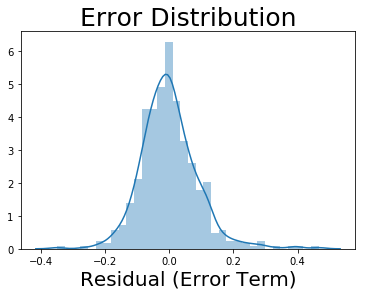

In [70]:
# Residual Analysis 
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

Above validates our assumption of normal distribution of error.

#### Homoscedasticity


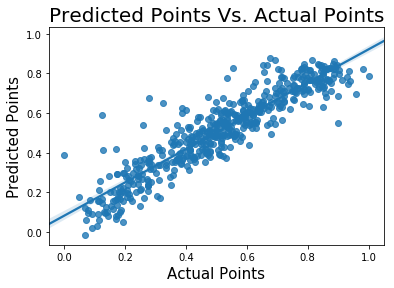

In [71]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

The errors are equally distrubuted around the stright line validated our assumption 

#### Independence of Errors


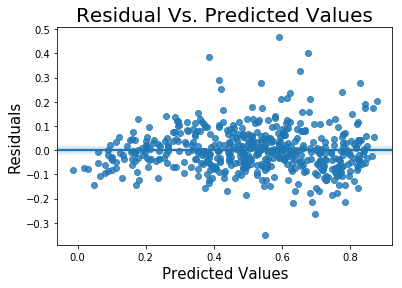

In [72]:
# Residual vs Predicted values. This is to validate assuption for error being independent 
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

No relation between Residual & Predicted Value

In [73]:
# Fetch Pearson Value for Predicted Value Against Residual 
import datetime
from scipy.stats import pearsonr
print("Pearson Value", pearsonr(y_train_pred, residual)[0])

Pearson Value 2.1784287208426853e-15


### 6.4 Report the final model.

In [74]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,4.73
1,windspeed,4.05
2,season_winter,2.58
3,season_spring,2.36
4,yr,2.06
5,mnth_Nov,1.79
6,mnth_Jan,1.65
7,weathersit_Mist/Cloudy,1.53
8,mnth_Dec,1.46
9,mnth_Jul,1.36


In [75]:
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]


,Correlation_Coefficient
temp,0.65
yr,0.59
season_spring,-0.55
mnth_Jan,-0.38
windspeed,-0.25
weathersit_Light Rain/Snow,-0.23
mnth_Sep,0.20
weathersit_Mist/Cloudy,-0.17
mnth_Jul,0.16
mnth_Dec,-0.14


In [76]:
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])
X_test.head(10)

,yr,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
185,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
536,1,0.901354,0.610133,0.153728,0.712034,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
300,0,0.511964,0.837699,0.334206,0.303382,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
222,0,0.881625,0.437098,0.339570,0.547400,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
153,0,0.817246,0.314298,0.537414,0.569029,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
405,1,0.256524,0.579218,0.326196,0.438104,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
199,0,0.856704,0.671103,0.372990,0.510354,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
172,0,0.774672,0.793903,0.276724,0.553728,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
513,1,0.814131,0.696865,0.331536,0.692706,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [77]:
y_test = X_test.pop('cnt')

In [78]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [79]:
y_pred = lr_model.predict(X_test_new)

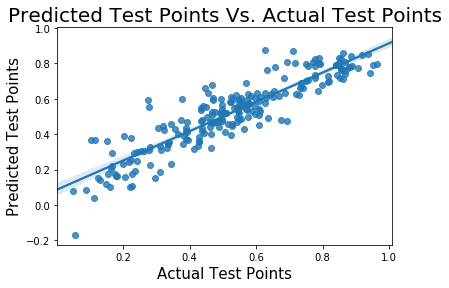

In [80]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

#### Looking at the R-Quare

In [81]:
#Get R-Square value 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8192108437203114

##### Looking at the RMSE

In [82]:
#Returns the mean squared error; we'll take a square root
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.09297474522834538

#### Final model

The Equation for the model would be 

No of rides = 0.298910 +  0.235385 * yr + 0.396968 * temp - 0.155365 * windspeed - 0.mnth_Dec * mnth_Dec - 0.058460 * mnth_Jan
              -0.060840 * mnth_Jul - 0.mnth_Nov * mnth_Nov + 0.047803 * mnth_Sep - 0.107089 * season_spring 
              +0.0.064666 * season_winter -0.046400 * weekday_Sat + 0.295830 * weekday_Sat -0.080187 * weathersit_Mist/Cloudy 
	
	
	
	